In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss

In [2]:
from time import time

In [3]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label"]

In [2]:
kdd_data_10percent = pd.read_csv("C:\\Users\\Rakesh Chauhan\\Documents\\2nd Sem\\kddcup.data_10_percent_corrected",\
                                 header = None, names = col_names)

In [6]:
kdd_data_10percent.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
kdd_data_10percent.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [5]:
kdd_data_10percent['label'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: label, dtype: int64

In [6]:
kdd_data_10percent.shape

(494021, 42)

In [7]:
kdd_data_10percent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 494021 entries, 0 to 494020
Data columns (total 42 columns):
duration                       494021 non-null int64
protocol_type                  494021 non-null object
service                        494021 non-null object
flag                           494021 non-null object
src_bytes                      494021 non-null int64
dst_bytes                      494021 non-null int64
land                           494021 non-null int64
wrong_fragment                 494021 non-null int64
urgent                         494021 non-null int64
hot                            494021 non-null int64
num_failed_logins              494021 non-null int64
logged_in                      494021 non-null int64
num_compromised                494021 non-null int64
root_shell                     494021 non-null int64
su_attempted                   494021 non-null int64
num_root                       494021 non-null int64
num_file_creations             494021 

In [9]:
kdd_data_10percent.protocol_type = kdd_data_10percent.protocol_type.astype('category')
kdd_data_10percent.service = kdd_data_10percent.service.astype('category')
kdd_data_10percent.flag = kdd_data_10percent.flag.astype('category')
kdd_data_10percent.label = kdd_data_10percent.label.astype('category')

In [10]:
kdd_data_10percent.protocol_type.cat.categories

Index(['icmp', 'tcp', 'udp'], dtype='object')

In [13]:
kdd_data_10percent.service.cat.categories
#len = 66

Index(['IRC', 'X11', 'Z39_50', 'auth', 'bgp', 'courier', 'csnet_ns', 'ctf',
       'daytime', 'discard', 'domain', 'domain_u', 'echo', 'eco_i', 'ecr_i',
       'efs', 'exec', 'finger', 'ftp', 'ftp_data', 'gopher', 'hostnames',
       'http', 'http_443', 'imap4', 'iso_tsap', 'klogin', 'kshell', 'ldap',
       'link', 'login', 'mtp', 'name', 'netbios_dgm', 'netbios_ns',
       'netbios_ssn', 'netstat', 'nnsp', 'nntp', 'ntp_u', 'other', 'pm_dump',
       'pop_2', 'pop_3', 'printer', 'private', 'red_i', 'remote_job', 'rje',
       'shell', 'smtp', 'sql_net', 'ssh', 'sunrpc', 'supdup', 'systat',
       'telnet', 'tftp_u', 'tim_i', 'time', 'urh_i', 'urp_i', 'uucp',
       'uucp_path', 'vmnet', 'whois'],
      dtype='object')

In [14]:
kdd_data_10percent.flag.cat.categories

Index(['OTH', 'REJ', 'RSTO', 'RSTOS0', 'RSTR', 'S0', 'S1', 'S2', 'S3', 'SF',
       'SH'],
      dtype='object')

In [17]:
kdd_data_10percent.label.cat.categories
#len 23

Index(['back.', 'buffer_overflow.', 'ftp_write.', 'guess_passwd.', 'imap.',
       'ipsweep.', 'land.', 'loadmodule.', 'multihop.', 'neptune.', 'nmap.',
       'normal.', 'perl.', 'phf.', 'pod.', 'portsweep.', 'rootkit.', 'satan.',
       'smurf.', 'spy.', 'teardrop.', 'warezclient.', 'warezmaster.'],
      dtype='object')

In [9]:
num_features = [
    "duration","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate"
]

In [18]:
features = kdd_data_10percent[num_features].astype(float)
features.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


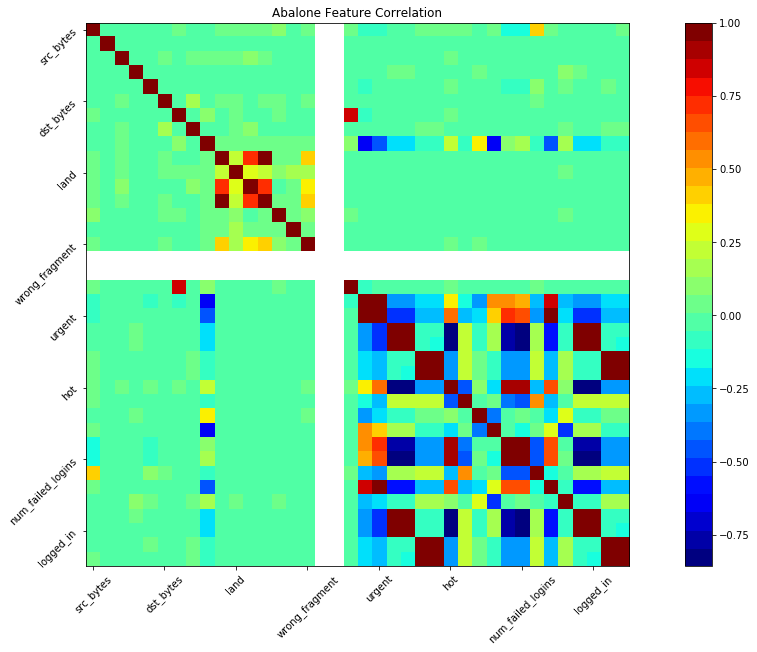

In [23]:
def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(20,10))
    ax1 = fig.add_subplot(111)
    
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    #ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=features.columns#['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=10, rotation=45)
    ax1.set_yticklabels(labels,fontsize=10, rotation=45)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax)#, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(features)

In [25]:
import seaborn as sns

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [29]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\matplotlib\colors.py:494: RuntimeWarning: invalid value encountered in less
  cbook._putmask(xa, xa < 0.0, -1)


---

In [4]:
from sklearn.preprocessing import MinMaxScaler
import warnings; warnings.simplefilter('ignore')
from sklearn.cross_validation import train_test_split

In [34]:
features.apply(lambda x: MinMaxScaler().fit_transform(x))
features.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494021.000000,4.940210e+05,4.940210e+05,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,...,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000,494021.000000
mean,47.979302,3.025610e+03,8.685324e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148247,0.010212,...,232.470778,188.665670,0.753780,0.030906,0.601935,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.746472,9.882181e+05,3.304000e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355345,1.798326,...,64.745380,106.040437,0.410781,0.109259,0.481309,0.042133,0.380593,0.380919,0.230590,0.230140
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
kdd_data_corrected = pd.read_csv("C:\\Users\\Rakesh Chauhan\\Documents\\2nd Sem\\corrected",\
                                 header = None, names = col_names)

In [6]:
kdd_data_corrected.protocol_type = kdd_data_corrected.protocol_type.astype('category')
kdd_data_corrected.service = kdd_data_corrected.service.astype('category')
kdd_data_corrected.flag = kdd_data_corrected.flag.astype('category')
kdd_data_corrected.label = kdd_data_corrected.label.astype('category')

In [7]:
kdd_data_corrected.shape

(311029, 42)

In [10]:
kdd_data_corrected[num_features] = kdd_data_corrected[num_features].astype(float)
kdd_data_corrected[num_features].apply(lambda x: MinMaxScaler().fit_transform(x))

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
1,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
2,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
3,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
4,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.01,0.00,0.00,0.0,0.00,0.00
5,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.00
6,0.000000,4.615949e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039216,0.011765,0.30,0.30,0.30,0.00,0.00,0.0,0.00,0.00
7,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.992157,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00
8,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
9,0.000000,3.549506e-06,0.000036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.278431,1.000000,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00


In [13]:
features_train, features_test, labels_train, labels_test = train_test_split(kdd_data_corrected[num_features],\
                                                                            kdd_data_corrected['label'],\
                                                                            test_size=0.1,random_state=42)

## Decision Tree

In [51]:
from sklearn import tree
import graphviz

In [42]:
clf = tree.DecisionTreeClassifier()

In [43]:
t0 = time()
clf = clf.fit(features_train, labels_train)
tt = time() - t0
print(tt,"seconds")

4.419838190078735 seconds


In [44]:
pred = clf.predict(features_test)

In [48]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)
print(format(round(acc,4)*100),"%")

98.14 %


In [49]:
tree.export_graphviz(clf, out_file='tree.dot') 

### Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [14]:
clf = RandomForestClassifier(n_estimators=100)
t0 = time()
clf = clf.fit(features_train, labels_train)
tt = time() - t0
print(tt,"seconds")

77.63038969039917 seconds


In [16]:
from sklearn.metrics import accuracy_score
pred = clf.predict(features_test)
acc = accuracy_score(pred, labels_test)
print(format(round(acc,4)*100),"%")

98.16 %


In [57]:
# kNN classifier 92.53%

### Logistic Regression - incomplete

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import decomposition
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
logistic = LogisticRegression()
pca = decomposition.PCA(n_components = 'mle', svd_solver = 'full')
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

In [19]:
t0 = time()
pipe.fit(features_train, labels_train)
tt = time() - t0
print(tt,"seconds")

4425.3989515304565 seconds


In [23]:
predictions = pipe.predict(features_test)

acc = accuracy_score(predictions, labels_test)

print(format(round(acc,4)*100),"%")

89.01 %


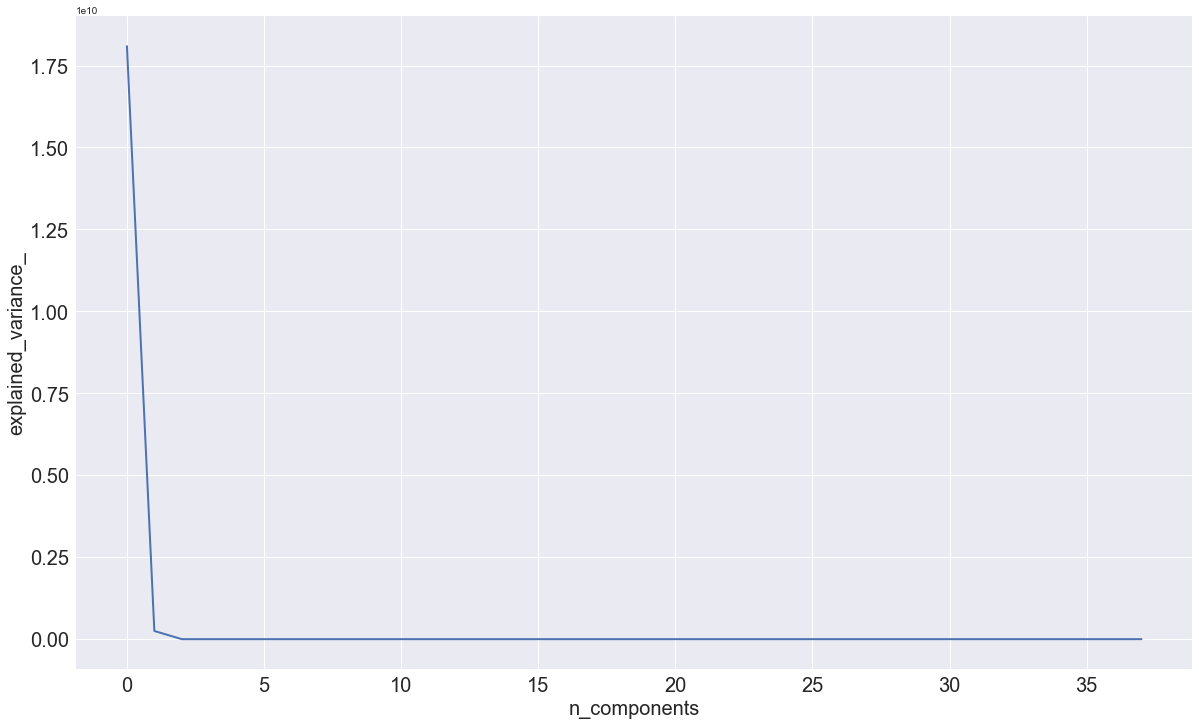

In [69]:
plt.figure(1, figsize=(20,12))
plt.clf()
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components', fontsize=20)
plt.ylabel('explained_variance_', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

---

In [14]:
labels = kdd_data_10percent['label'].copy()
labels[labels!='normal.'] = 'attack.'
labels.value_counts()

attack.    396743
normal.     97278
Name: label, dtype: int64

In [17]:
clf = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', leaf_size=500)
t0 = time()
clf.fit(features,labels)
tt = time() - t0

In [19]:
print(format(round(tt,3)))

1568.686


In [24]:
kdd_data_corrected['label'].value_counts()

smurf.              164091
normal.              60593
neptune.             58001
snmpgetattack.        7741
mailbomb.             5000
guess_passwd.         4367
snmpguess.            2406
satan.                1633
warezmaster.          1602
back.                 1098
mscan.                1053
apache2.               794
processtable.          759
saint.                 736
portsweep.             354
ipsweep.               306
httptunnel.            158
pod.                    87
nmap.                   84
buffer_overflow.        22
multihop.               18
named.                  17
sendmail.               17
ps.                     16
rootkit.                13
xterm.                  13
teardrop.               12
land.                    9
xlock.                   9
xsnoop.                  4
ftp_write.               3
sqlattack.               2
phf.                     2
worm.                    2
perl.                    2
udpstorm.                2
loadmodule.              2
i

In [25]:
kdd_data_corrected['label'][kdd_data_corrected['label']!='normal.'] = 'attack.'
kdd_data_corrected['label'].value_counts()

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


attack.    250436
normal.     60593
Name: label, dtype: int64

In [26]:
from sklearn.cross_validation import train_test_split

In [27]:
kdd_data_corrected[num_features] = kdd_data_corrected[num_features].astype(float)
kdd_data_corrected[num_features].apply(lambda x: MinMaxScaler().fit_transform(x))

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:356: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
F:\Anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\preprocessing\data.py:321: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if yo

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
1,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
2,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
3,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
4,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.01,0.00,0.00,0.0,0.00,0.00
5,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,1.000000,1.00,0.00,0.01,0.00,0.00,0.0,0.00,0.00
6,0.000000,4.615949e-07,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.039216,0.011765,0.30,0.30,0.30,0.00,0.00,0.0,0.00,0.00
7,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.992157,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00
8,0.000000,1.671292e-06,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.000000,0.996078,1.00,0.01,0.00,0.00,0.00,0.0,0.00,0.00
9,0.000000,3.549506e-06,0.000036,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.278431,1.000000,1.00,0.00,0.01,0.01,0.00,0.0,0.00,0.00


In [28]:
features_train, features_test, labels_train, labels_test = train_test_split(
kdd_data_corrected[num_features],
kdd_data_corrected['label'],
test_size=0.1,
random_state=42)

In [29]:
t0 = time()
pred = clf.predict(features_test)
tt = time() - t0
print(format(round(tt,3)))

667.629


In [30]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(pred, labels_test)
print(format(round(acc,4)))

0.9253
